In [79]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot

T = 900  # absolute temperature, K
R = 8.3144598e3  # L Pa K^-1 mol^-1 
H =  3.3e-5 # Henry's law constant for solute gas (Xe), mol(gas)/(L(sol)*atm) [Steward, 1973]
H = 1/H  # Switch Henry constat to different units [L(sol)*atm/mol(gas)]
# Wanna H in Pa/ (mol/L) [http://www.3rd1000.com/chem101/chem103v.htm]
# H(Kr) = 2.5e-5; H(He) = 3.7e-4
# K_L = 13.5  # Mass Transfer coefficient, ft/hr; Peebles, Figure 5 for d_bubble=0.020in
# liquid phase mass transfer coefficient i n the range of 1 < 5 < 100 f%/h [Peebles,p.9]
K_L = 100  # from Figure 3 Peebles
K_L = 30.48*K_L/3600  #Mass Transfer coefficient cm/sec 
# Must be in m/s
# for He bubble diameter d_bubble = 0:508mm (0.020in[Robertson, 3.9.1])
Q_m_L = 9.92E+6  # g/s to get 22 sec loop time
d = 200 # pipe diameter, cm
A_C = math.pi*(d/2)**2  # contactor cross-section, cm2
L = 100  # Length of liquid-gas contactor, cm
# gas-liquid interfacial area per unit volume of contactor, a
d_bubble = 0.508
a = (1e+5*d_bubble) / (A_C*L)  # cm2/cm3=1/cm

# To m/s Q_L = Q_m_L / (4.9602*A_c)
Q_L = 1e-6*Q_m_L / 4.9602  # m3/s
Q_G = 13                   # m3/s

print(K_L, Q_L, Q_G, a*K_L)
alpha = (R*T*Q_L)/(H*Q_G)
beta = (K_L*a*A_C*L*(1+alpha))/Q_L

eps = (1-np.exp(-beta))/(1+alpha)

print(alpha)
print(np.exp(-1))

print("Xe removal efficiency %s" % eps)

0.8466666666666667 1.9999193580903993 13 0.013690720411355627
0.03798915372697751
0.36787944117144233
Xe removal efficiency 0.9634012035765744


In [73]:
import xml.etree.ElementTree as ET

tree = ET.parse('./eps_vs_mass_transfer_peebles.xml')
root = tree.getroot()
K_L_xml = []
eps_xml = []


for h in root.iter("point"):
    K_L_xml.append(float(h.attrib["dx"]))
    eps_xml.append(float(h.attrib["dy"]))
    
print(K_L_xml)
print(eps_xml)

[1.0091597507717565, 1.2027271323755786, 1.4670212567667509, 1.6719799064852945, 1.8557571067725114, 2.05973434607599, 2.370918998694817, 2.7155884622310418, 3.019053961461706, 3.4351531185530932, 3.9345483484689114, 4.4472536930448054, 5.035060954560848, 5.625580460185823, 6.264567649948724, 7.127935277536958, 8.565547859312456, 9.381901648398385, 10.073924585012621, 11.634222612704997, 13.525367967543476, 16.28007111515955, 18.523399117766157, 20.221503382813207, 23.314521089198003, 27.51053826745254, 33.057801800382734, 39.526608775087304, 45.19592795415317, 50.91413682972477, 59.67912487512981, 67.6759824992694, 77.50876952349736, 87.6024755948722, 100.0]
[0.03229253771166021, 0.03881676822312263, 0.04735389197177855, 0.05409432912764744, 0.05979644545299166, 0.06609962534843827, 0.07563207438893957, 0.08569004557444207, 0.09425651853545515, 0.10731981214090734, 0.12219300948775758, 0.13708522055916986, 0.15253314915527127, 0.1680574426256669, 0.18394846267775328, 0.207727747740508

In [24]:
from scipy.optimize import curve_fit

def eps(x, r, L, alpha):
    return (1-np.exp(-2*x*r*L*alpha))  /  (1 + alpha)

# Reference data
K_L_ref = np.array([1, 2, 3, 5, 7, 10, 20, 50, 100])  # ft/hr
eps_ref = np.array([0.032, 0.066, 0.095, 0.16, 0.21, 0.28, 0.48, 0.8, 0.96])

popt, pcov = curve_fit(eps, K_L_ref, eps_ref)

print(popt, pcov)



[1.49801503 1.55826667 0.00711981] [[ 3.32454180e+11 -3.45825814e+11 -8.71180016e-03]
 [-3.45825814e+11  3.59735269e+11  2.72023637e-03]
 [-3.10841273e-03 -3.10841273e-03  2.93734216e-05]]


<IPython.core.display.Javascript object>


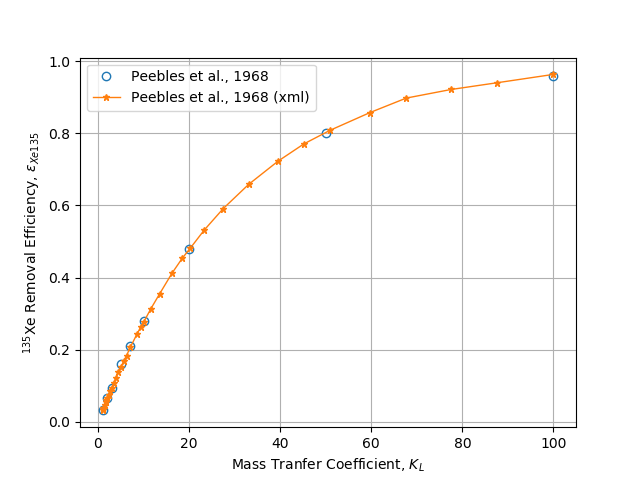

In [44]:
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1)
ax = fig_1.add_subplot(111)
ax.grid(True)

ax.plot(K_L_ref, eps_ref, 'o', label='Peebles et al., 1968', linewidth=1.5, markerfacecolor="None")
ax.plot(K_L_xml, eps_xml, '*-', label='Peebles et al., 1968 (xml)', linewidth=1.0, markersize=5)
#ax.plot(K_L_ref, eps(K_L_ref, *popt),  'r-', label=r'fit: r=%5.3fcm, L=%5.3fcm, $\alpha$=%5.10f' % tuple(popt))

ax.set_ylabel(r'$^{135}$Xe Removal Efficiency, $\epsilon_{Xe135}$')
ax.set_xlabel(r'Mass Tranfer Coefficient, $K_L$')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')

ax.legend(loc=0)

fig_1.show()